In [445]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [446]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [447]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- The TRAIN data contains the sale price that we can use to compare data to

In [448]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [449]:
y = pd.DataFrame(train_data.SalePrice)

In [450]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [451]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [452]:
features = [#'Id', 
        'MSSubClass', 
        #'MSZoning', 
        # 'LotFrontage', 'LotArea', 
        #'Street',
        # 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        # 'LandSlope', 
        'Neighborhood', 
        # 'Condition1', 'Condition2', 'BldgType',
       # 'HouseStyle', 
       'OverallQual', 
       # 'OverallCond', 
       'YearBuilt', 'YearRemodAdd',
       # 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 
       'ExterQual', 'ExterCond', 
       # 'Foundation', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       # 'BsmtFinSF1',
       # 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 
       # 'Heating',
       # 'HeatingQC', 
       # 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF',
       # 'LowQualFinSF', 
       'GrLivArea', 
       # 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       # 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 
       # 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       # 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 
       # 'GarageQual',
       # 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       # 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       # 'Fence', 'MiscFeature', 'MiscVal', 
        # 'MoSold', 'YrSold', 
       # 'SaleType',
       # 'SaleCondition'
       'SalePrice'
]

testfeatures = [#'Id', 
        'MSSubClass', 
        #'MSZoning', 
        # 'LotFrontage', 'LotArea', 
        #'Street',
        # 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        # 'LandSlope', 
        'Neighborhood', 
        # 'Condition1', 'Condition2', 'BldgType',
       # 'HouseStyle', 
       'OverallQual', 
       # 'OverallCond', 
       'YearBuilt', 'YearRemodAdd',
       # 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 
       'ExterQual', 'ExterCond', 
       # 'Foundation', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       # 'BsmtFinSF1',
       # 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 
       # 'Heating',
       # 'HeatingQC', 
       # 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF',
       # 'LowQualFinSF', 
       'GrLivArea', 
       # 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       # 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 
       # 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       # 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 
       # 'GarageQual',
       # 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       # 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       # 'Fence', 'MiscFeature', 'MiscVal', 
        # 'MoSold', 'YrSold', 
       # 'SaleType',
       # 'SaleCondition'
       # 'SalePrice'
]

In [453]:

X = pd.DataFrame(train_data[features])
X

,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,60,CollgCr,7,2003,2003,196.0,Gd,TA,856,856,854,1710,8,2,548,208500
1,20,Veenker,6,1976,1976,0.0,TA,TA,1262,1262,0,1262,6,2,460,181500
2,60,CollgCr,7,2001,2002,162.0,Gd,TA,920,920,866,1786,6,2,608,223500
3,70,Crawfor,7,1915,1970,0.0,TA,TA,756,961,756,1717,7,3,642,140000
4,60,NoRidge,8,2000,2000,350.0,Gd,TA,1145,1145,1053,2198,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,Gilbert,6,1999,2000,0.0,TA,TA,953,953,694,1647,7,2,460,175000
1456,20,NWAmes,6,1978,1988,119.0,TA,TA,1542,2073,0,2073,7,2,500,210000
1457,70,Crawfor,7,1941,2006,0.0,Ex,Gd,1152,1188,1152,2340,9,1,252,266500
1458,20,NAmes,5,1950,1996,0.0,TA,TA,1078,1078,0,1078,5,1,240,142125


In [454]:
X.describe()

,MSSubClass,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,6.099315,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,1515.463699,6.517808,1.767123,472.980137,180921.195890
std,42.300571,1.382997,30.202904,20.645407,181.066207,438.705324,386.587738,436.528436,525.480383,1.625393,0.747315,213.804841,79442.502883
min,20.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,2.000000,0.000000,0.000000,34900.000000
25%,20.000000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,5.000000,1.000000,334.500000,129975.000000
50%,50.000000,6.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,1464.000000,6.000000,2.000000,480.000000,163000.000000
75%,70.000000,7.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,728.000000,1776.750000,7.000000,2.000000,576.000000,214000.000000
max,190.000000,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,5642.000000,14.000000,4.000000,1418.000000,755000.000000


In [455]:
X.isna().sum()

MSSubClass      0
Neighborhood    0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      8
ExterQual       0
ExterCond       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [456]:
X_test = test_data[testfeatures]
X_test.isna().sum()

MSSubClass       0
Neighborhood     0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea      15
ExterQual        0
ExterCond        0
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
TotRmsAbvGrd     0
GarageCars       1
GarageArea       1
dtype: int64

<Axes: xlabel='Neighborhood', ylabel='Sale Price'>

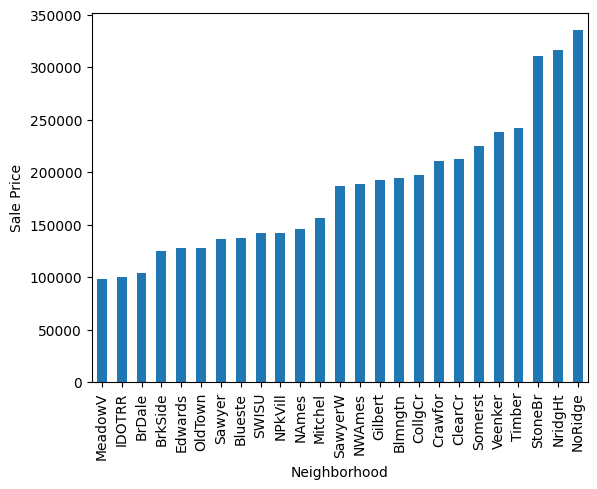

In [457]:
X['Neighborhood'].value_counts()
nb = X.groupby(['Neighborhood'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [458]:
map = {'MeadowV' : 1, 'IDOTRR' : 2, 'BrDale' : 3, 'BrkSide' : 4, 'Edwards' : 5, 
       'OldTown' : 6, 'Sawyer' : 7, 'Blueste' : 8, 'SWISU' : 9, 'NPkVill' : 10, 
       'NAmes' : 11, 'Mitchel' : 12, 'SawyerW' : 13, 'NWAmes' : 14, 'Gilbert' : 15,
       'Blmngtn' : 16, 'CollgCr' : 17, 'Crawfor' : 18, 'ClearCr' : 19, 'Somerst' : 20,
       'Veenker' : 21, 'Timber' : 22, 'StoneBr' : 23, 'NridgHt' : 24, 'NoRidge' : 25}
nhood = X.groupby(['Neighborhood'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean']

X['Neighborhood'] = X['Neighborhood'].map(map)
X_test['Neighborhood'] = X_test['Neighborhood'].map(map)


/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_75186/1463916169.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Neighborhood'] = X_test['Neighborhood'].map(map)


NOTES ON QUALITY RATING

Ex	Excellent
Gd	Good
TA	Typical - slight dampness allowed
Fa	Fair - dampness or some cracking or settling
Po	Poor - Severe cracking, settling, or wetness
NA	No Basement

<Axes: xlabel='ExterQual', ylabel='Sale Price'>

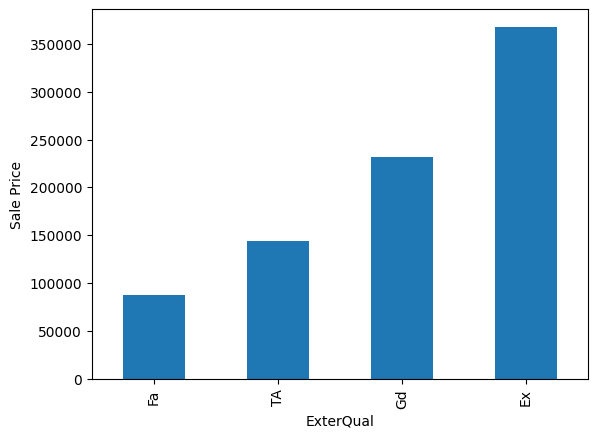

In [459]:
nb = X.groupby(['ExterQual'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [460]:
qualmap = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
X['ExterQual'] = X['ExterQual'].map(qualmap)
X_test['ExterQual'] = X_test['ExterQual'].map(qualmap)
X['ExterCond'] = X['ExterCond'].map(qualmap)
X_test['ExterCond'] = X_test['ExterCond'].map(qualmap)
X

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_75186/1651270509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ExterQual'] = X_test['ExterQual'].map(qualmap)
/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_75186/1651270509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ExterCond'] = X_test['ExterCond'].map(qualmap)


,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,60,17,7,2003,2003,196.0,4,3,856,856,854,1710,8,2,548,208500
1,20,21,6,1976,1976,0.0,3,3,1262,1262,0,1262,6,2,460,181500
2,60,17,7,2001,2002,162.0,4,3,920,920,866,1786,6,2,608,223500
3,70,18,7,1915,1970,0.0,3,3,756,961,756,1717,7,3,642,140000
4,60,25,8,2000,2000,350.0,4,3,1145,1145,1053,2198,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,15,6,1999,2000,0.0,3,3,953,953,694,1647,7,2,460,175000
1456,20,14,6,1978,1988,119.0,3,3,1542,2073,0,2073,7,2,500,210000
1457,70,18,7,1941,2006,0.0,5,4,1152,1188,1152,2340,9,1,252,266500
1458,20,11,5,1950,1996,0.0,3,3,1078,1078,0,1078,5,1,240,142125


In [461]:
SFfeatures = ['TotalBsmtSF', '2ndFlrSF', '1stFlrSF']
Gfeatures = ['GarageTotal', 'GarageCars']

X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF'] + X['1stFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['2ndFlrSF'] + X_test['1stFlrSF']

X['GarageTotal'] = X['GarageArea'] * X['GarageCars']
X_test['GarageTotal'] = X_test['GarageArea'] * X_test['GarageCars']
X

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_75186/4241074763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['2ndFlrSF'] + X_test['1stFlrSF']
/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_75186/4241074763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageTotal'] = X_test['GarageArea'] * X_test['GarageCars']


,MSSubClass,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,TotalSF,GarageTotal
0,60,17,7,2003,2003,196.0,4,3,856,856,854,1710,8,2,548,208500,2566,1096
1,20,21,6,1976,1976,0.0,3,3,1262,1262,0,1262,6,2,460,181500,2524,920
2,60,17,7,2001,2002,162.0,4,3,920,920,866,1786,6,2,608,223500,2706,1216
3,70,18,7,1915,1970,0.0,3,3,756,961,756,1717,7,3,642,140000,2473,1926
4,60,25,8,2000,2000,350.0,4,3,1145,1145,1053,2198,9,3,836,250000,3343,2508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,15,6,1999,2000,0.0,3,3,953,953,694,1647,7,2,460,175000,2600,920
1456,20,14,6,1978,1988,119.0,3,3,1542,2073,0,2073,7,2,500,210000,3615,1000
1457,70,18,7,1941,2006,0.0,5,4,1152,1188,1152,2340,9,1,252,266500,3492,252
1458,20,11,5,1950,1996,0.0,3,3,1078,1078,0,1078,5,1,240,142125,2156,240


<Axes: >

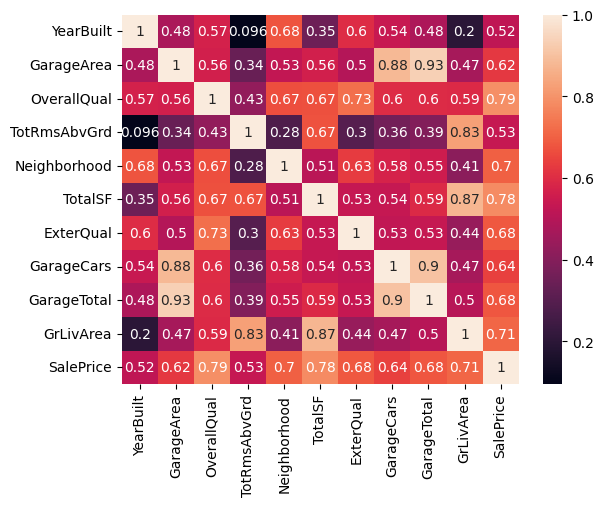

In [462]:
X_corr = X[['YearBuilt', 'GarageArea','OverallQual','TotRmsAbvGrd', 'Neighborhood', 'TotalSF', 'ExterQual','GarageCars', 'GarageTotal', 'GrLivArea', 'SalePrice']].dropna().corr()
sns.heatmap(X_corr, annot=True)

In [389]:
X = X.drop('SalePrice', axis=1)

X = X.drop('ExterCond', axis=1)
X_test = X_test.drop('ExterCond', axis=1)

X = X.drop(SFfeatures, axis=1)
X_test = X_test.drop(SFfeatures, axis=1)

X = X.drop(Gfeatures, axis=1)
X_test = X_test.drop(Gfeatures, axis=1)
X

NameError: name 'Gfeatures' is not defined

In [334]:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [335]:
print(X.head())
print(model.predict(X.head()))

   MSSubClass  Neighborhood  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0          60            17            7       2003          2003       196.0   
1          20            21            6       1976          1976         0.0   
2          60            17            7       2001          2002       162.0   
3          70            18            7       1915          1970         0.0   
4          60            25            8       2000          2000       350.0   

   ExterQual  TotRmsAbvGrd  GarageCars  GarageArea  TotalSF  
0          4             8           2         548     2566  
1          3             6           2         460     2524  
2          4             6           2         608     2706  
3          3             7           3         642     2473  
4          4             9           3         836     3343  
[208500. 181500. 223500. 140000. 250000.]


In [336]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.3, test_size=0.7, random_state=1)

In [338]:
from sklearn.metrics import mean_absolute_error, roc_auc_score


model = DecisionTreeRegressor(random_state=1)


model.fit(X_train, y_train)
preds = model.predict(X_valid)
mean_absolute_error(y_valid, preds)

np.float64(27964.85567514677)

In [339]:
def getmae(max_leaves, trainX, trainy, validX, validy):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, random_state=1)
    model.fit(trainX, trainy)
    preds = model.predict(validX)
    mae = mean_absolute_error(validy, preds)
    return mae

In [340]:
for i in [30, 35, 40, 45]:
    print("Max Leaves: %d \t\tMAE: %.2f" %(i, getmae(i, X_train, y_train, X_valid, y_valid)))

Max Leaves: 30 		MAE: 26034.57
Max Leaves: 35 		MAE: 25986.85
Max Leaves: 40 		MAE: 25622.54
Max Leaves: 45 		MAE: 25695.85


In [341]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

fst_model = RandomForestRegressor(random_state=1)
fst_model.fit(X_train, y_train)
preds = fst_model.predict(X_valid)
mean_squared_error(y_valid, preds)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


np.float64(1183100797.2175992)

In [348]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_leaf_nodes': [50, 75, 100, 150],
    'max_depth': [15, 20, 25, 30],
    'n_estimators': [150, 200, 250, 300]
}

gscv = GridSearchCV(estimator=fst_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
gscv.fit(X_train, y_train.values.ravel())
bestparams = gscv.best_params_
bestparams

{'max_depth': 20, 'max_leaf_nodes': 100, 'n_estimators': 250}

In [349]:
optim_model = RandomForestRegressor(**bestparams, random_state=1)
optim_model.fit(X_train, y_train)
opreds = optim_model.predict(X_valid)
print("base MSE : %.2f\n" %(mean_squared_error(y_valid, preds)))
print("optim MSE : %.2f\n" %(mean_squared_error(y_valid, opreds)))
print("base MAE : %.2f\n" %(mean_absolute_error(y_valid, preds)))
print("optim MAE : %.2f\n" %(mean_absolute_error(y_valid, opreds)))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


base MSE : 1183100797.22

optim MSE : 1206650514.89

base MAE : 20788.58

optim MAE : 20745.37



In [344]:
sample = pd.DataFrame({"Id" : test_data.Id, "SalePrice" : fst_model.predict(X_test)})

sample.to_csv('submission.csv', index=False)